<a href="https://colab.research.google.com/github/nadifacodes/handwriting_recognition/blob/main/handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of df:  (42000, 785)
Shapes of X after reshaping:  (42000, 28, 28, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8491 - loss: 0.5181 - val_accuracy: 0.9467 - val_loss: 0.1735
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9581 - loss: 0.1353 - val_accuracy: 0.9646 - val_loss: 0.1169
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9735 - loss: 0.0854 - val_accuracy: 0.9677 - val_loss: 0.1037
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9810 - loss: 0.0596 - val_accuracy: 0.9667 - val_loss: 0.1084
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9874 - loss: 0.0432 - val_accuracy: 0.9656 - val_loss: 0.1114
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9717 - val_loss: 0.0997
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9692 - val_loss: 0.1060
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0231 - 

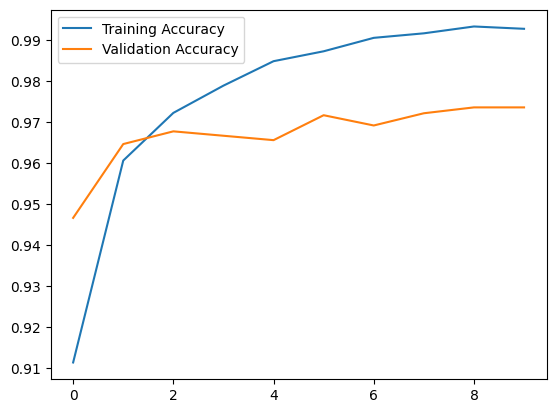

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


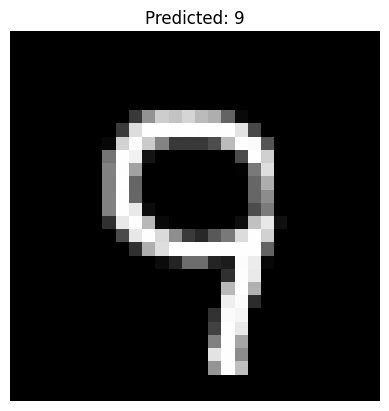

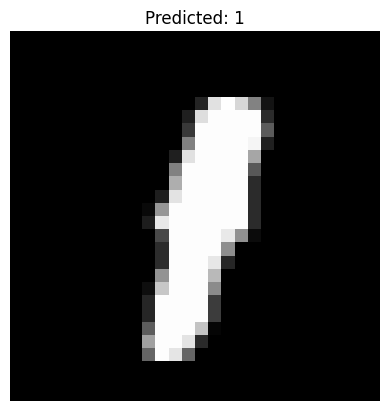

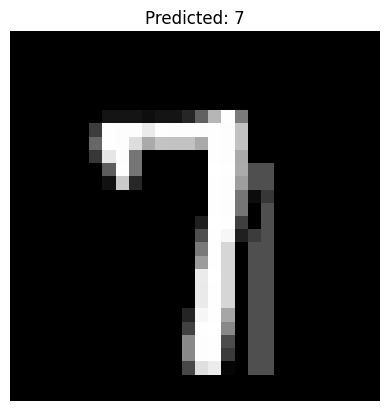

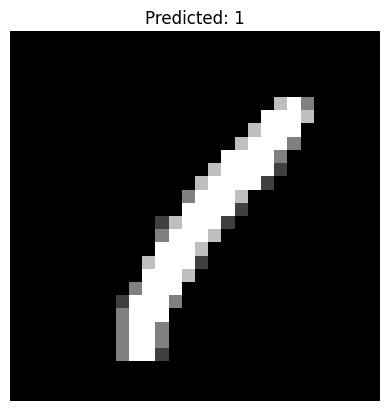

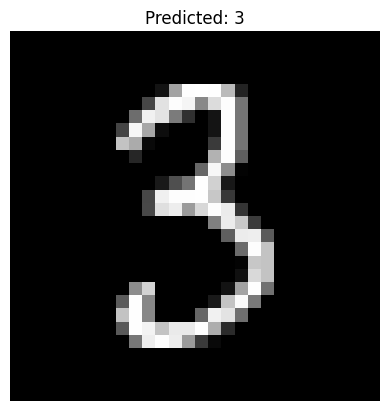

In [16]:
from pandas.core.arrays import categorical
#import libraries
import pandas as pd #data processing
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split #splits data
from tensorflow.keras.models import Sequential #builds neural network models
from tensorflow.keras.layers import Input, Dense, Flatten #Dense = fully connected neural network, Flatten = coverts multi-dimensional input i.e images to 1D vector to go into the Dense layers
from tensorflow.keras.utils import to_categorical #converts labels i.e 0,1,2,3 to encoded vectors i.e [0,0,1,0]

#Load & explore the data
df = pd.read_csv('Train.csv')
print("Shape of df: ", df.shape)

#Split the data
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

#Preprocess the data
if not isinstance(X, pd.DataFrame):
  X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce') #ensures values in X are numeric & any values that can't be converted set it to NaN
X = X.fillna(0) #replace NaN values = 0
X = X.values / 255.0 #normalize the data by 255
X = X.reshape(-1, 28, 28, 1)#reshapes into image format
print("Shapes of X after reshaping: ", X.shape) #shows final data structure

#One-Hot Encode(converts to numbers) the labels
Y = to_categorical(Y, num_classes=10)

#Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

#Build the neural network model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(), #unwraps into 1 long vector of length 784
    Dense(128, activation='relu'), #helps learning non-linear patterns
    Dense(64, activation='relu'), #learns more abstract patterns & builds on what the first layer learned
    Dense(10, activation='softmax') #converts output into probabilities that sum to 1
])
model.compile(
    optimizer='adam', #how the model adjusts it's weights
    loss= 'categorical_crossentropy', #for multi-class classification model(two or more outputs)
    metrics=['accuracy'])
model.summary()

#Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

#Evaluate the model & Visualize it
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f'Testing accuracy: {val_accuracy * 100:.2f}%')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

#Make predictions with new dataset
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1) #finds the index of the maximum value across the classes
#make first 5 predictions
for i in range(5):
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Predicted: {predicted_labels[i]}')
  plt.axis('off')
  plt.show()
